In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\vehicles.csv')

In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [4]:
df = df.reindex(columns=['id', 'url', 'region', 'region_url', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price'])

In [5]:
len(df.columns)

26

# DATA CLEANING

#### removing useless features -> id, url, region_url, VIN, image_url,description, county, state, posting_date

In [6]:
df = df.drop(['id','url', 'region_url','VIN','image_url','description','county','state','posting_date'], axis = 1)

### visualising null values

In [7]:
nullVal = df.isnull().sum().to_frame()
nullVal

,0
region,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242
transmission,2556


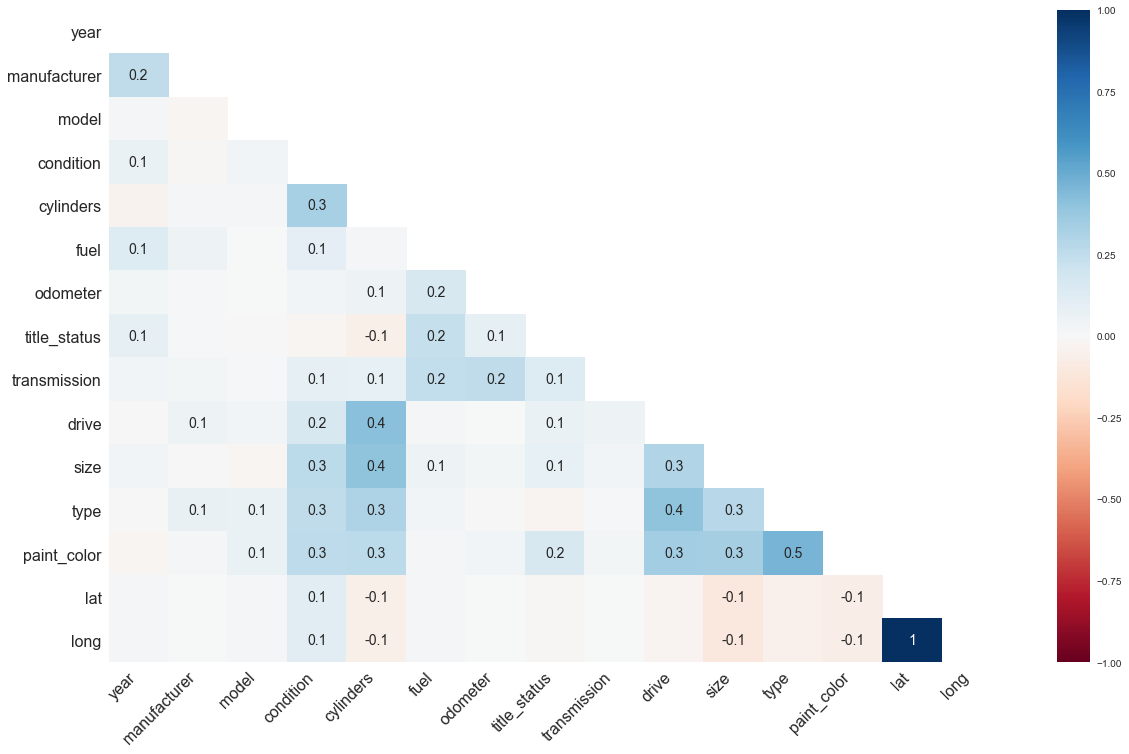

In [8]:
fig = ms.heatmap(df)
fig_copy = fig.get_figure()
fig_copy.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\heatmap.png', bbox_inches = 'tight')

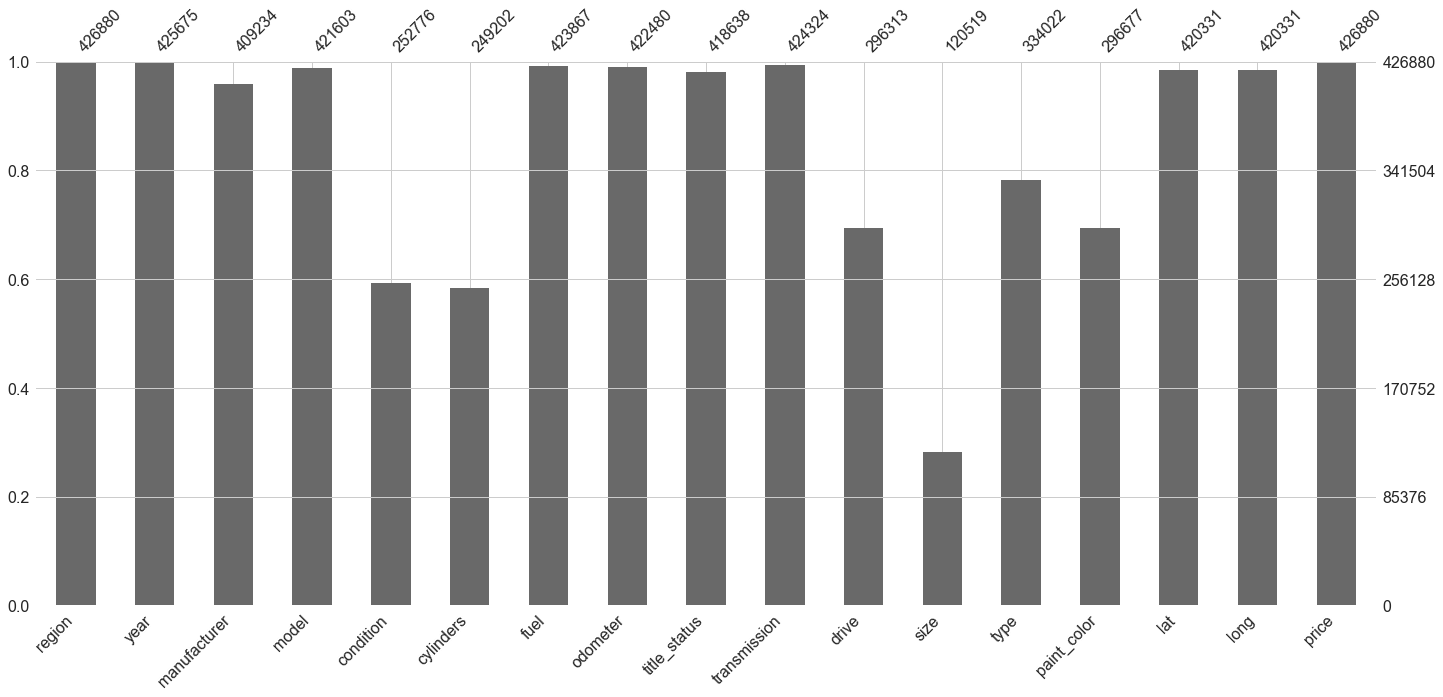

In [9]:
fig = ms.bar(df)
fig_copy = fig.get_figure()
fig_copy.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\bar.png', bbox_inches = 'tight')

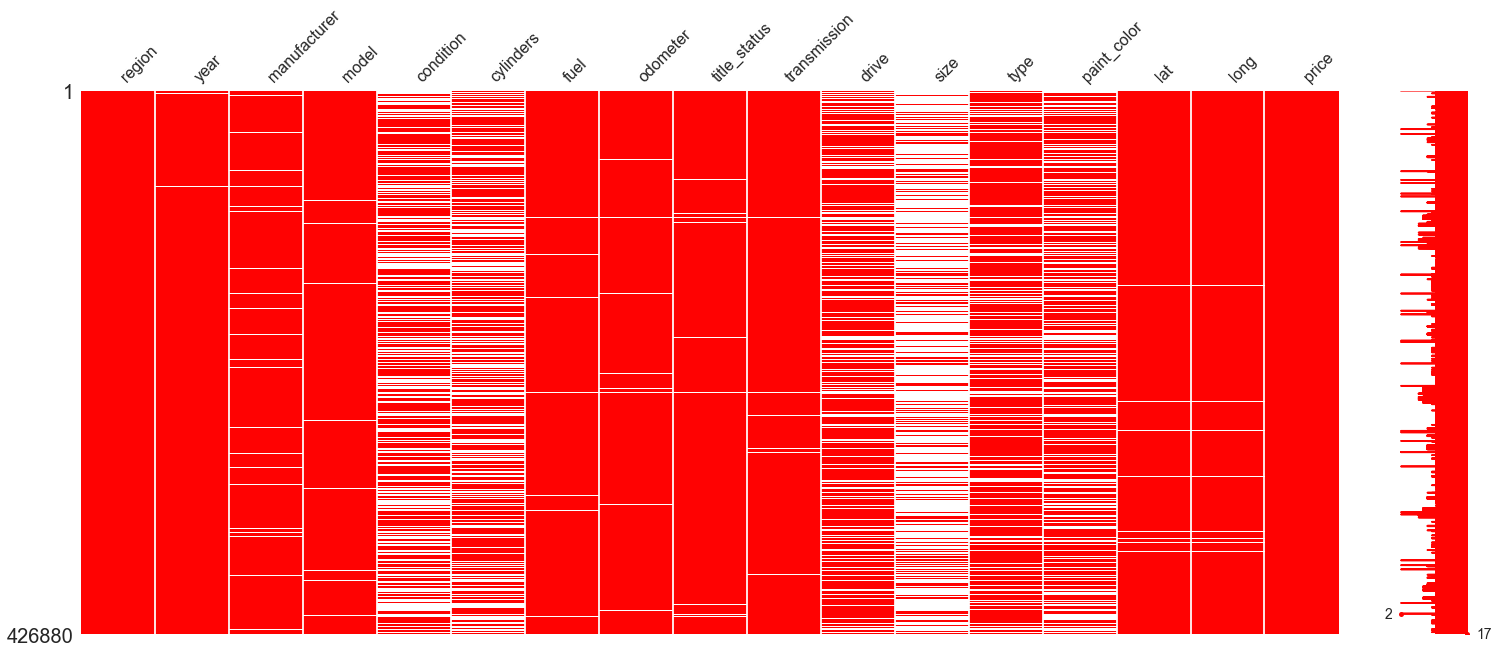

In [10]:
fig = ms.matrix(df , color=(1, 0.01, 0.01))
fig_copy = fig.get_figure()
fig_copy.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\matrix.png', bbox_inches = 'tight')

# PREPROCESSING

### A) encoding of categorial features

In [11]:
#seperating numeric variable and categorical variable
num_col=['year','odometer','lat','long']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

In [12]:
df2 = df.copy()

In [13]:
#object of LabelEncoder
encoder=LabelEncoder()
def encodeCatData(df):
    for cat in (cat_cols):  
        data = df[cat]
        non = np.array(data.dropna())
        im = encoder.fit_transform(non)
        data.loc[data.notnull()] = np.squeeze(im)
    return df

In [14]:
edf = encodeCatData(df2)

In [15]:
edf

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000
3,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,2019.0,31,19778,2,5,2,32226.0,0,2,1,NaN,9,NaN,33.786500,-84.445400,23590
426876,397,2020.0,41,23652,2,NaN,2,12029.0,0,2,1,NaN,9,8,33.786500,-84.445400,30590
426877,397,2020.0,6,29347,2,NaN,0,4174.0,0,2,NaN,NaN,4,10,33.779214,-84.411811,34990
426878,397,2018.0,23,13498,2,5,2,30112.0,0,2,1,NaN,9,9,33.786500,-84.445400,28990


### B) handling of NULL values

#### 1.) deleting NULL value rows

In [16]:
delDF = edf.copy()

In [17]:
delDF = delDF.dropna(how='any',axis=0) 

In [18]:
delDF

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
31,16,2013.0,13,14531,0,5,2,128000.0,0,0,2,1,10,0,32.592000,-85.518900,15000
55,16,2004.0,13,15476,2,6,0,88000.0,0,0,0,1,8,1,32.547500,-85.468200,19900
59,16,2012.0,16,20911,0,5,2,95000.0,0,0,1,1,5,9,32.628739,-85.461820,14000
65,16,2001.0,13,15712,2,6,0,144700.0,0,1,2,1,10,10,32.630400,-85.401600,22500
73,16,2017.0,10,10328,0,6,2,90000.0,4,0,2,2,9,5,32.822400,-85.770400,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,397,2005.0,7,24855,0,6,2,130000.0,1,0,0,1,10,1,43.452800,-110.739300,18000
426809,397,1990.0,20,16931,2,6,2,114400.0,0,0,0,1,0,0,43.452800,-110.739300,18000
426831,397,1985.0,31,2595,3,5,2,115000.0,0,0,2,3,4,8,41.143700,-104.796200,9800
426833,397,1997.0,19,29316,2,6,2,69550.0,0,0,2,0,2,10,43.642930,-108.222976,6800


In [19]:
nullV = delDF.isnull().sum().to_frame()
nullV

,0
region,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


In [20]:
delDF.to_csv(r'C:\Users\Asus\Desktop\ML-PROJECT\finaldel.csv',index=False)

#### 2.) iterative imputation (Bayesian Ridge() , KNN(), DecisionTree() , Random Forest() )

In [21]:
iidf = edf.copy()

In [22]:
ierrordf = pd.DataFrame()

In [23]:
def iteImputer(df , k , models):    
    for model in tqdm(models):
        print("Evaluating: ",model.__class__.__name__)
        impute = IterativeImputer(model)
        df1 = df.copy()
        for col in df.columns:
            idata = impute.fit_transform(df1[col].values.reshape(-1,1))
            idata = idata.astype('int64')
            idata = pd.DataFrame(np.ravel(idata))
            df1[col]=idata
            X = df1.iloc[: , :-1].to_numpy()
            Y = df1.iloc[: , -1:].to_numpy().reshape(-1)
            cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=1)
            ierrordf['*'+model.__class__.__name__] = cross_val_score(
        model, X, Y, scoring='neg_mean_squared_error',
        cv=cv)

In [24]:
models = [BayesianRidge(),KNeighborsRegressor(n_neighbors=20)
         ,DecisionTreeRegressor(max_features='sqrt', random_state=0),
         RandomForestRegressor(max_depth = 5 , random_state = 0)]
iteImputer(iidf , 4 , models)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Evaluating:  BayesianRidge


 25%|████████████████████▊                                                              | 1/4 [04:25<13:16, 265.37s/it]

Evaluating:  KNeighborsRegressor


 50%|█████████████████████████████████████████▌                                         | 2/4 [09:56<09:30, 285.08s/it]

Evaluating:  DecisionTreeRegressor


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [14:34<04:42, 282.85s/it]

Evaluating:  RandomForestRegressor


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [39:12<00:00, 588.19s/it]


#### 3.) simple imputation (mean, median, mode)

In [25]:
sidf = edf.copy()

In [26]:
def simpleImputer(df , k , base):
    m_arr = ['median' , 'mean' , 'most_frequent']
    for i in tqdm(range(3)):
        stat = m_arr[i]
        print("Imputating: " ,stat)
        X = df.iloc[: , :-1].to_numpy()
        Y = df.iloc[: , -1:].to_numpy().reshape(-1)
        pipeline = Pipeline(steps = [('si' , SimpleImputer(missing_values=np.nan, strategy=stat)) , ('m' , base)])
        cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=1)
        ierrordf[stat] = cross_val_score(
        pipeline, X, Y, scoring='neg_mean_squared_error',
        cv=cv)
        

In [27]:
simpleImputer(sidf , 4 , BayesianRidge())

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Imputating:  median


 33%|████████████████████████████                                                        | 1/3 [00:27<00:55, 27.77s/it]

Imputating:  mean


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:49<00:25, 25.97s/it]

Imputating:  most_frequent


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:34<00:00, 31.52s/it]


In [28]:
ierrordf

,*BayesianRidge,*KNeighborsRegressor,*DecisionTreeRegressor,*RandomForestRegressor,median,mean,most_frequent
0,-2.312751e+14,-2.316112e+14,-2.520904e+14,-2.355035e+14,-2.312751e+14,-2.312751e+14,-2.312752e+14
1,-2.167576e+14,-2.280323e+14,-2.314510e+14,-2.377182e+14,-2.167576e+14,-2.167576e+14,-2.167574e+14
2,-1.244694e+14,-1.279814e+14,-2.577724e+14,-1.281613e+14,-1.244693e+14,-1.244694e+14,-1.244690e+14
3,-2.117348e+13,-2.682075e+13,-3.228660e+14,-2.412709e+13,-2.117348e+13,-2.117348e+13,-2.117348e+13
4,-2.312690e+14,-2.371749e+14,-2.545559e+14,-2.329105e+14,-2.312690e+14,-2.312690e+14,-2.312691e+14
5,-2.167529e+14,-2.164759e+14,-2.470825e+14,-2.296732e+14,-2.167529e+14,-2.167529e+14,-2.167527e+14
6,-1.244701e+14,-1.285725e+14,-4.050156e+14,-1.150146e+14,-1.244699e+14,-1.244701e+14,-1.244696e+14
7,-2.118198e+13,-3.199619e+13,-1.637283e+14,-3.207786e+13,-2.118198e+13,-2.118198e+13,-2.118198e+13


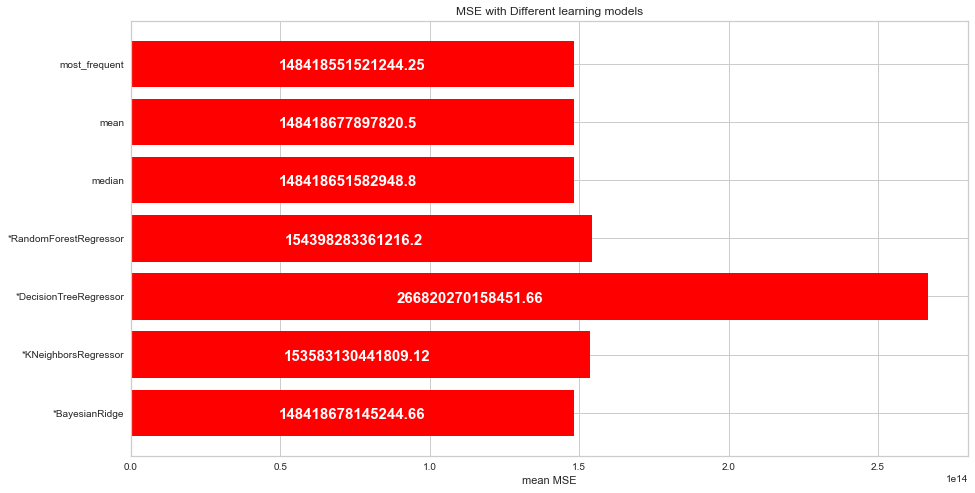

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
mean_arr = -ierrordf.mean()
names = ierrordf.columns
ax.barh(names, mean_arr , color = 'red')
ax.set_title('MSE with Different learning models')
ax.set_xlabel('mean MSE')
for i in ax.patches:
    plt.text(i.get_width()/3, i.get_y()+0.3,
             str(i.get_width()),
             fontsize = 15, fontweight ='bold',
             color ='white')
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\different-imputations-method',dpi=None)
plt.show()

### C) filling of missing values

In [30]:
finaldfwo = edf.copy()

In [31]:
for col in finaldfwo.columns:
    if(col == 'price'):
        continue
    finaldfwo[col].fillna(finaldfwo[col].mode()[0], inplace=True)

In [32]:
nullV = finaldfwo.isnull().sum().to_frame()
nullV

,0
region,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


### D) removing Outliers using IQR method

In [33]:
Q1 = finaldfwo.quantile(0.25)
Q3 = finaldfwo.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

region            208.000000
year                9.000000
manufacturer       18.000000
model           12478.000000
condition           1.000000
cylinders           0.000000
fuel                0.000000
odometer        94870.000000
title_status        0.000000
transmission        0.000000
drive               1.000000
size                0.000000
type                5.000000
paint_color         7.000000
lat                 8.140000
long               30.877973
price           20585.750000
dtype: float64


In [34]:
finaldf = finaldfwo.copy()
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
outlier_col = ['odometer' , 'year' , 'price']
for col in outlier_col:
    finaldf = finaldf[(finaldf[col] >= low[col]) & (finaldf[col] <= high[col])]
finaldf = finaldf[finaldf['price']!=0]

In [35]:
print('INITIAL DATASET: ', finaldfwo.shape)
print('FINAL DATASET: ', finaldf.shape)
print('ROWS DROPPED :' ,finaldfwo.shape[0] - finaldf.shape[0] ,'COLUMNS DROPPED:', 26 - finaldf.shape[1])

INITIAL DATASET:  (426880, 17)
FINAL DATASET:  (367088, 17)
ROWS DROPPED : 59792 COLUMNS DROPPED: 9


In [36]:
finaldf.to_csv(r'C:\Users\Asus\Desktop\ML-PROJECT\final.csv',index=False)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
scaler = StandardScaler()

In [39]:
data = finaldf.to_numpy()

In [40]:
X = data[: , :-1]
Y = data[ :  ,-1]

In [41]:
x = finaldf.iloc[: , :-1]
y = finaldf.iloc[ :  ,-1:]

In [42]:
type(x)

pandas.core.frame.DataFrame

In [43]:
x.shape
# y.shape

(367088, 16)

In [44]:
Xstd = scaler.fit_transform(X) 

## splitting data into train and test

In [45]:
x_train, x_test, y_train, y_test = train_test_split(Xstd, Y, test_size = 0.2 , random_state = 0)

In [90]:
#remove the negative predicted values
def negativeHandler(y_test,y_pred):
    ind=[idx for idx in range(len(y_pred)) if(y_pred[idx] > 0)]
    y_test = y_test[ind]
    y_pred = y_pred[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

In [96]:
#function to give R-2 score of the regression model
def score(y_test,y_pred):
    report=[]
    report.append(mean_squared_log_error(y_test, y_pred))
    report.append(np.sqrt(report[0]))
    report.append(r2_score(y_test,y_pred))
    report.append(round(100 * r2_score(y_test,y_pred) , 8))
    return (report)

In [97]:
#dataframe that store the score of each model
model_reports=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','accuracy(%)'])

# 1) Linear Regression

In [101]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred=linear_model.predict(x_test)
y_test_1,y_pred_1=negativeHandler(y_test,y_pred)
linear_r = score(y_test_1,y_pred_1)
print('Coefficients: \n', linear_model.coef_)
print("MSLE : {}".format(linear_r[0]))
print("Root MSLE : {}".format(linear_r[1]))
print("R2 Score : {} or {}%".format(linear_r[2],linear_r[3]))
model_reports['Linear Regression']=linear_r

Coefficients: 
 [  -98.05799595  5440.03913238   -67.65993778   101.53938483
   318.02526445  3382.09850884 -2132.15727593 -3074.3065491
  -828.65168914  1429.74152128  -678.98037097    65.30601859
    64.89993395  -358.37893595    16.21305792  -837.41952165]
MSLE : 1.2427216386760818
Root MSLE : 1.1147742545807566
R2 Score : 0.5055331695199661 or 50.55331695%


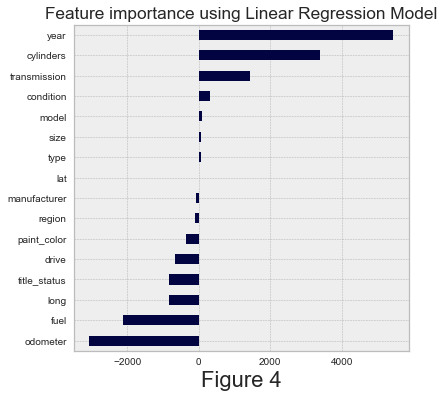

In [102]:
#Ploting feature importance graph
coef = pd.Series(linear_model.coef_, index = finaldf.columns[:-1])
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh" , color = '#010440')
plt.title("Feature importance using Linear Regression Model")
plt.xlabel('Figure 4' , fontsize = 22)
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\Linear-Regression-Feature-Importance.jpg')
plt.show()

# 2) Ridge Regression

In [49]:
#model object and fitting model
Ridge_model = Ridge(alpha=20 , solver='auto')
Ridge_model.fit(x_train,y_train)
y_pred = Ridge_model.predict(x_test)

In [50]:
y_test_2  ,y_pred_2 = negativeHandler(y_test,y_pred)
ridge_score = score(y_test_2,y_pred_2)
print("MSLE : {}".format(ridge_score[0]))
print("Root MSLE : {}".format(ridge_score[1]))
print("R2 Score : {} or {}%".format(ridge_score[2],ridge_score[3]))
model_reports['Ridge Regression'] = ridge_score

MSLE : 1.2423812334994238
Root MSLE : 1.1146215651508917
R2 Score : 0.5055294433932428 or 50.5529%


dict_keys(['ax', 'estimator', 'is_fitted']) 


dict_keys(['ax', 'estimator', 'is_fitted']) 




AlphaSelection(ax=<AxesSubplot:>,
               estimator=RidgeCV(alphas=array([1.00000000e+10, 9.33092744e+09, 8.70662068e+09, 8.12408458e+09,
       7.58052437e+09, 7.07333228e+09, 6.60007502e+09, 6.15848211e+09,
       5.74643497e+09, 5.36195677e+09, 5.00320295e+09, 4.66845237e+09,
       4.35609903e+09, 4.06464440e+09, 3.79269019e+09, 3.53893170e+09,
       3.30215148e+09, 3.08121359e+09, 2.87505804e+09,...
       4.91732965e-02, 4.58832461e-02, 4.28133240e-02, 3.99488019e-02,
       3.72759372e-02, 3.47819065e-02, 3.24547446e-02, 3.02832867e-02,
       2.82571150e-02, 2.63665090e-02, 2.46023982e-02, 2.29563192e-02,
       2.14203749e-02, 1.99871964e-02, 1.86499079e-02, 1.74020937e-02,
       1.62377674e-02, 1.51513429e-02, 1.41376081e-02, 1.31916996e-02,
       1.23090791e-02, 1.14855124e-02, 1.07170483e-02, 1.00000000e-02]),
                                 store_cv_values=True))

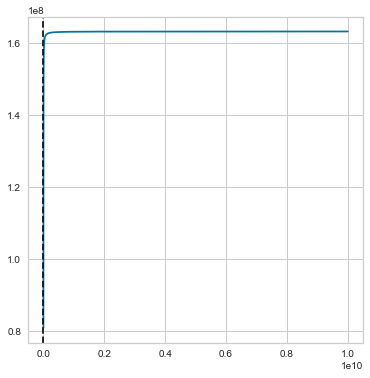

In [51]:
#finding optimal regularisation paramater
alphas = 10**np.linspace(10,-2,300)
model = RidgeCV(alphas=alphas)
gp = AlphaSelection(model)
gp.fit(x_train,y_train)


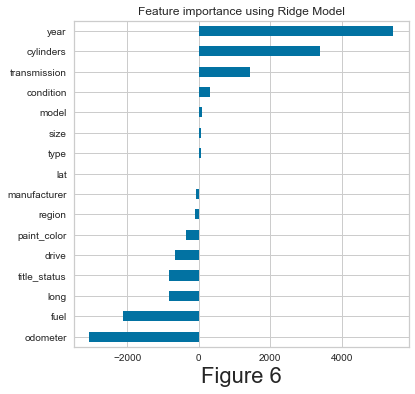

In [53]:
# plotting feature importance of ridge regression
coef = pd.Series(RR.coef_, index = x.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\Ridge-Regression-Feature-Importance.jpg')
plt.show()

# 3) Lasso Regression

In [54]:
#fiiting lasso model
lasso_model = Lasso(alpha=0.0003)
lasso_model.fit(x_train,y_train)
y_pred=lasso_model.predict(x_test)

In [55]:
y_test_3,y_pred_3  =negativeHandler(y_test,y_pred)
lasso_score=score(y_test_3,y_pred_3)
print("MSLE : {}".format(lasso_score[0]))
print("Root MSLE : {}".format(lasso_score[1]))
print("R2 Score : {} or {}%".format(lasso_score[2],lasso_score[3]))
model_reports['Lasso Regression'] = lasso_score

MSLE : 1.2427215212056533
Root MSLE : 1.114774201892766
R2 Score : 0.5055331682291462 or 50.5533%


# 4) KNN

In [56]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN_model=KNeighborsRegressor(n_neighbors=i)
    KNN_model.fit(x_train,y_train)
    y_pred=KNN_model.predict(x_test)
    error = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.8282630566978255
K = 2  , Root MSLE = 0.7682419082792071
K = 3  , Root MSLE = 0.779497482126134
K = 4  , Root MSLE = 0.7967557448719711
K = 5  , Root MSLE = 0.8091277041556656
K = 6  , Root MSLE = 0.8190383795630225
K = 7  , Root MSLE = 0.8294756424053276
K = 8  , Root MSLE = 0.8413499682127017
K = 9  , Root MSLE = 0.8487032486753816


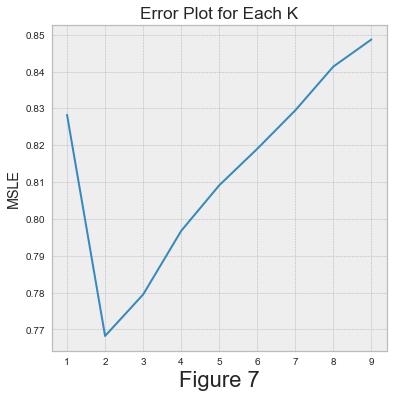

In [88]:
#plotting error
plt.figure(figsize=(6 ,6))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.xlabel('Figure 7' , fontsize = 22)
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\KNN-Error-Plot.jpg')
plt.show()

In [58]:
#for best k =2
best_KNN=KNeighborsRegressor(n_neighbors=2) 
best_KNN.fit(x_train,y_train)
y_pred=best_KNN.predict(x_test)

In [59]:
#model evaluation
knn_score=score(y_test,y_pred)
print("MSLE : {}".format(knn_score[0]))
print("Root MSLE : {}".format(knn_score[1]))
print("R2 Score : {} or {}%".format(knn_score[2],knn_score[3]))
model_reports['KNN']=knn_score

MSLE : 0.5901956296364776
Root MSLE : 0.7682419082792071
R2 Score : 0.7785374164683622 or 77.8537%


# 5) Random Forest

In [62]:
forest_model = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
forest_model.fit(x_train,y_train)
y_pred = forest_model.predict(x_test)

In [63]:
forest_score = score(y_test,y_pred)
print("MSLE : {}".format(forest_score[0]))
print("Root MSLE : {}".format(forest_score[1]))
print("R2 Score : {} or {}%".format(forest_score[2],forest_score[3]))
model_reports['RandomForest Regressor']=forest_score

MSLE : 0.501629366773989
Root MSLE : 0.7082579803814348
R2 Score : 0.9142823901383491 or 91.4282%


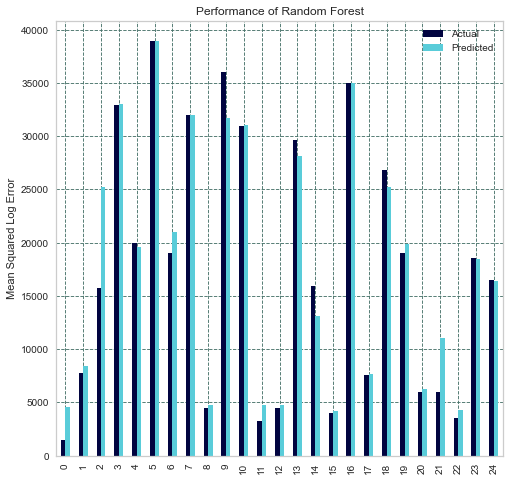

In [64]:
feature_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
feature_pred_df = feature_pred_df.head(25)
feature_pred_df.plot(kind='bar',figsize=(8,8) , color = ['#010440', '#59CCD9'])
plt.grid(which='major', linestyle='dashed', linewidth='0.9', color='#49736B')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\Random-Forest-Performance.jpg')
plt.show()

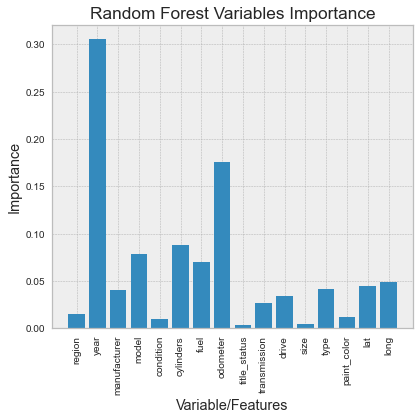

In [65]:
imp = forest_model.feature_importances_
features=finaldf.columns[:-1]
with plt.style.context('bmh'):
    x_values = list(range(len(imp)))
    plt.figure(figsize=(6,6))
    plt.bar(x_values, imp, orientation = ('vertical'))
    plt.xticks(x_values, features, rotation=(90))
    plt.ylabel('Importance'); 
    plt.xlabel('Variable/Features'); 
    plt.title('Random Forest Variables Importance')
    plt.tight_layout()
    plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\Random-Forest-Variables-Imp.png',dpi=600)
    plt.show()

# 6) Adaboost

In [66]:
adb_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=25),n_estimators=190,learning_rate=0.6001)
adb_model.fit(x_train, y_train)
y_pred = adb_model.predict(x_test)

In [67]:
adb_score=score(y_test,y_pred)
print("MSLE : {}".format(adb_score[0]))
print("Root MSLE : {}".format(adb_score[1]))
print("R2 Score : {} or {}%".format(adb_score[2],adb_score[3]))
model_reports['AdaBoost Regressor']=r7_ab

MSLE : 0.4661957472349182
Root MSLE : 0.6827852863345242
R2 Score : 0.9157013805472839 or 91.5701%


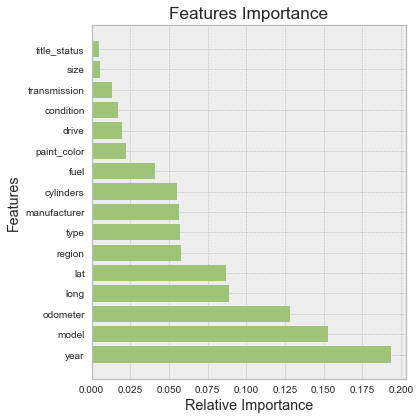

In [68]:
imp = adb_model.feature_importances_
features=finaldf.columns[:-1]
plt.style.use('bmh')
idx = np.argsort(imp)
idx = [x for x in reversed(idx)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(idx)), imp[idx], color='g', align='center')
plt.yticks(range(len(idx)), features[idx])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\Adaboost-Features-Importance2.png',dpi=600)
plt.show();

# 7) XGBoost

In [69]:
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4005,max_depth = 25, alpha = 5, n_estimators = 190)
xg_model.fit(x_train,y_train)
y_pred = xg_model.predict(x_test)

In [70]:
y_test_1,y_pred_1 = negativeHandler(y_test,y_pred)
xg_score = score(y_test_1,y_pred_1)
print("MSLE : {}".format(xg_score[0]))
print("Root MSLE : {}".format(xg_score[1]))
print("R2 Score : {} or {}%".format(xg_score[2],xg_score[3]))
model_reports['XgBoost Regressor'] = xg_score

MSLE : 0.4094578869527758
Root MSLE : 0.6398889645499255
R2 Score : 0.9051539892875509 or 90.5154%


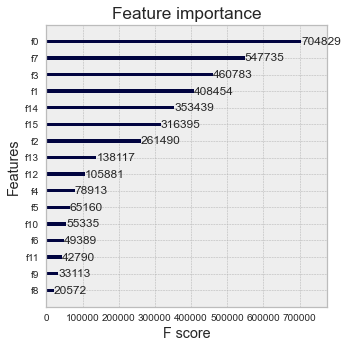

In [73]:
xg_model.plot_importance(xg_reg , color = '#010440')
plt.rcParams['figure.figsize'] = [8, 8]
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\XGBoost-Features-Importance.jpg')
plt.show()

# Conclusion

In [77]:
model_reports

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,AdaBoost Regressor,XgBoost Regressor
MSLE,1.242722,1.242381,1.242722,0.590196,0.501629,0.466196,0.409458
Root MSLE,1.114774,1.114622,1.114774,0.768242,0.708258,0.682785,0.639889
R2 Score,0.505533,0.505529,0.505533,0.778537,0.914282,0.915701,0.905154
Accuracy(%),50.553300,50.552900,50.553300,77.853700,91.428200,91.570100,90.515400


In [78]:
model_accuracy = model_reports.loc['accuracy(%)']

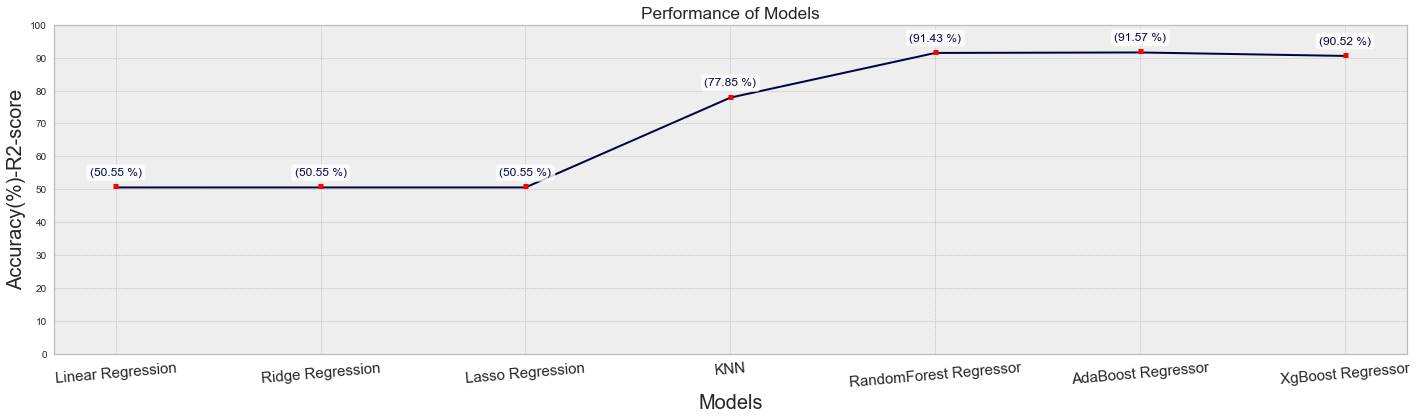

In [87]:
x = list(range(len(model_accuracy)))
y = np.arange(0,101)
d = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy , color = '#010440')
plt.yticks(y)
plt.xticks(fontsize=15)
plt.xticks(rotation = (5))
plt.xlabel("Models",fontsize=20)
plt.ylabel("accuracy(%)-R2-score",fontsize=20)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2.5))+" %)"
    plt.text(a, b+4, val,horizontalalignment='center',verticalalignment='center',color='#010440',bbox=d)
    plt.text(a, b+3, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.savefig(r'C:\Users\Asus\Desktop\ML-PROJECT\plots\Overall-Performance.jpg',dpi=800)
plt.show();